<a href="https://colab.research.google.com/github/A-Burnhard/K-means-clustering-on-wine-dataset/blob/main/K_means_and_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading or importing  wine dataset to notebook
cols = ["class", "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "0D280_0D315_of_diluted_wines", "Proline" ]
wine_data = pd.read_csv("wine.data", names = cols)
wine_data.head()

In [ ]:
# Extract the input attributes (columns 1-13)
X = wine_data.iloc[:, 1:14]
print(X)

**Normalization of input attributes**

In [ ]:
# Perform normalization on the input attributes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Defining K-values to try**

In [15]:
# Define different K values to try
k_values = [2, 3, 5]

**Applying K-means clustering for each k value above and visualizing the results**

In [ ]:
import matplotlib.pyplot as plt

# Apply K-means clustering for each K value
for k in k_values:
    # Create a K-means instance
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the resulting solution for the current K value
    #print(f"K={k}: Cluster centers = {kmeans.cluster_centers_}")
    #print(f"       Labels = {labels}")
    #print("\n")


    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
    plt.title(f"K-means Clustering (K={k})")
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.show()

**By setting K equal to the actual number of classes in the data set, we compare the cluster groupings with the actual class structure of the data points**

In [ ]:
# Get the actual class labels (column 0)
actual_labels = wine_data.iloc[:,0]
print(actual_labels)

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, completeness_score

# Set the value of K equal to the number of unique class labels
k = len(actual_labels.unique())

# Create a K-means instance
kmeans = KMeans(n_clusters = k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
predicted_labels = kmeans.labels_

# Get the cluster labels for each data point
predicted_labels = kmeans.labels_

# Compare the clustering results using evaluation metrics
ari = adjusted_rand_score(actual_labels, predicted_labels)
ami = adjusted_mutual_info_score(actual_labels, predicted_labels)
completeness = completeness_score(actual_labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Adjusted Mutual Information (AMI): {ami}")
print(f"Completeness Score: {completeness}")

**Visualizing comparison using Adjusuted Rand Index**

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


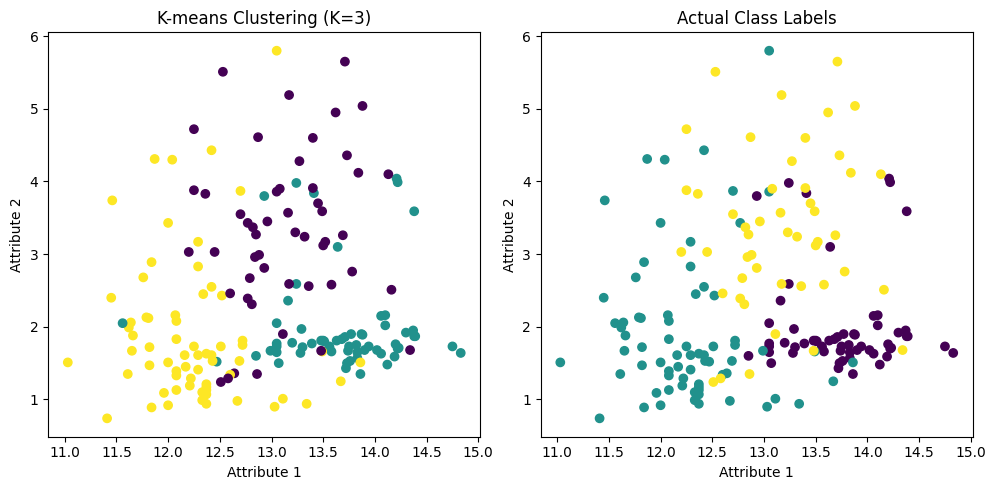

Adjusted Rand Index (ARI): 0.8974949815093207


In [31]:
# Set the value of K equal to the number of unique class labels
k = len(actual_labels.unique())
print(k)

# Create a K-means instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
predicted_labels = kmeans.labels_

# Compare the clustering results using the adjusted Rand index (ARI)
ari = adjusted_rand_score(actual_labels, predicted_labels)

# Plot the clusters and actual class labels
plt.figure(figsize=(10, 5))

# Plot the predicted clusters
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predicted_labels, cmap='viridis')
plt.title(f"K-means Clustering (K={k})")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")

# Plot the actual class labels
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=actual_labels, cmap='viridis')
plt.title("Actual Class Labels")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")

plt.tight_layout()
plt.show()

print(f"Adjusted Rand Index (ARI): {ari}")